<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
    <style>
        h1 {
            color: red;
            font-weight: bold;
            text-align: center; /* This centers the text */
        }
    </style>
</head>
<body>
    <h1>Sales Data Analysis of Commercial Store</h1>
</body>
</html>


#


<h2 style="color: gold;">Objective:</h2>
    <p>
        Create an analysis of sales data for a commercial store. 
        This means you will be working with sales-related data and performing analyses to uncover insights 
        that can help improve the store’s sales performance.
    </p>



<h2 style="color: gold;">Problem Statement:</h2>
<p>
        The primary goal of this analysis is to identify factors that affect sales performance at a commercial store. 
        We aim to analyze historical sales data to uncover trends, patterns, and key metrics that influence the overall 
        success of the store. The focus will be on improving sales forecasting, inventory management, and customer insights 
        to boost the store's performance.
 </p>

<h2 style="color: gold;">Expected Outcomes:</h2>
    <p>
        The following deliverables are expected from the analysis:
        <ul>
            <li><strong>Well-commented Jupyter Notebook:</strong> The analysis and code will be clearly documented with detailed comments explaining each step.</li>
            <li><strong>Summary Report:</strong> A detailed report summarizing the key findings and insights from the data analysis process.</li>
            <li><strong>PDF for Key Findings:</strong> A PDF document that summarizes the key insights, recommendations, and visualizations.</li>
            <li><strong>Power BI Dashboard:</strong> A Power BI dashboard presenting key metrics and visual insights into the sales data for easy interpretation and decision-making.</li>
        </ul>
    </p>

<h2 style="color: gold;">Insights and Recommendations:</h2>
    <p>
        After analyzing the sales data, we will identify key insights, such as:
        <ul>
            <li>Seasonal trends that impact sales.</li>
            <li>Top-performing products and categories.</li>
            <li>Customer behavior and preferences.</li>
            <li>Sales regions or segments with the highest growth potential.</li>
        </ul>
        Based on these insights, the recommendations will focus on strategies to optimize inventory management, 
        marketing campaigns, and sales operations to increase revenue and customer satisfaction.
    </p>

 <h2 style="color: gold;">Methodology:</h2>
 <p>
        The following methodology will be followed for the sales data analysis:
        <ul>
            <li><strong>Data Collection:</strong> Collect sales data for a defined period from the commercial store (retail or online).</li>
            <li><strong>Data Cleaning:</strong> Preprocess and clean the data to handle missing values, outliers, and duplicate entries.</li>
            <li><strong>Exploratory Data Analysis (EDA):</strong> Perform an in-depth analysis to uncover trends, patterns, and correlations within the data.</li>
            <li><strong>Data Visualization:</strong> Create meaningful visualizations to illustrate insights clearly.</li>
        </ul>
</p>

#

 <h2 style="color: gold;">Let us begin our Analysis:</h2>

 <h3 style="color: blue;">Loading and analyzing dataset:</h3>

In [1]:
# loading required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')


In [2]:
# loading and viewing our dataset

df = pd.read_csv('Sales_data.csv')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [3]:
# lets us see the number of rows and columns
df.shape

(9800, 18)

In [4]:
# lets view a snapshot of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

 <h3 style="color: blue;">Cleaning and pre-processing Data:</h3>

In [5]:
#lets check if there are any duplicates
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [6]:
#lets check for nulls
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
# there are only 11 nulls in the postal code we can drop them as they wont make any difference
df.dropna(inplace=True)

In [8]:
#lets re-check for nulls
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [9]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [10]:
# we wont need the Row ID , Order Id , Customer ID , Product Id , Customer Name as they arent helpful in our analysis so lets drop these

df.drop(['Row ID' , 'Order ID' , 'Customer ID' , 'Product ID' , 'Customer Name'] , inplace=True,axis=1) 

In [11]:
# lets look at the data set
df.shape

(9789, 13)

In [12]:
df.head(1)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [13]:
# lets fix the data types of the columns

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst=True)
df['Ship Mode'] = df['Ship Mode'].astype('category') 
df['Segment'] = df['Segment'].astype('category') 
df['Country'] = df['Country'].astype('str')
df['City'] = df['City'].astype('str')
df['State'] = df['State'].astype('str')
df['Region'] = df['Region'].astype('category') 
df['Category'] = df['Category'].astype('category') 
df['Sub-Category'] = df['Sub-Category'].astype('category')
df['Product Name'] = df['Product Name'].astype('str')
df['Sales'] = df['Sales'].astype('int')  
df['Postal Code'] = df['Postal Code'].astype('int')  

In [14]:
#lets re check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9789 non-null   datetime64[ns]
 1   Ship Date     9789 non-null   datetime64[ns]
 2   Ship Mode     9789 non-null   category      
 3   Segment       9789 non-null   category      
 4   Country       9789 non-null   object        
 5   City          9789 non-null   object        
 6   State         9789 non-null   object        
 7   Postal Code   9789 non-null   int32         
 8   Region        9789 non-null   category      
 9   Category      9789 non-null   category      
 10  Sub-Category  9789 non-null   category      
 11  Product Name  9789 non-null   object        
 12  Sales         9789 non-null   int32         
dtypes: category(5), datetime64[ns](2), int32(2), object(4)
memory usage: 660.9+ KB


<h3 style="color: blue;">Feature Engineering </h3>

In [15]:
# lets extract year and month columns from order date  date for time series analysis 

df['Order year'] = df['Order Date'].dt.year

# Extract year and month as 'YYYY-MM' format
df['Order Y-M'] = df['Order Date'].dt.to_period('M')


<h3 style="color: blue;">Exploratory Data Analysis</h3>


 <h3 style="color: black;">Segment Analysis</h3>

In [16]:
# types of customers

df['Segment'].unique()


['Consumer', 'Corporate', 'Home Office']
Categories (3, object): ['Consumer', 'Corporate', 'Home Office']

In [17]:
# number of customer in each segment

number_of_customers = df['Segment'].value_counts().reset_index()


print(number_of_customers)

       Segment  count
0     Consumer   5096
1    Corporate   2948
2  Home Office   1745


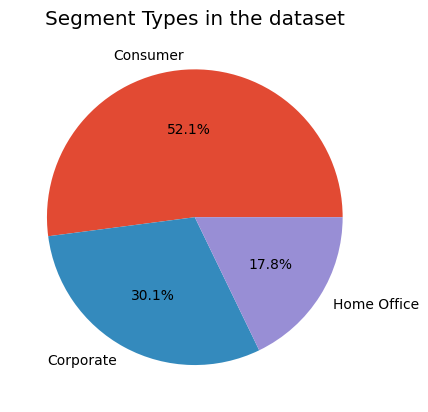

In [18]:
# Creating a pie chart


plt.pie(df['Segment'].value_counts() , labels=df['Segment'].unique(), autopct= '%1.1f%%')

plt.title('Segment Types in the dataset')

plt.show()

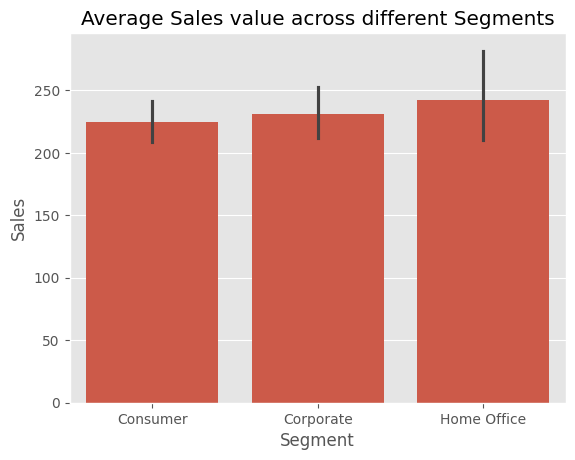

In [19]:
# lets check with Segment and Sales

sns.barplot(x = df['Segment'] , y=df['Sales'])
plt.title('Average Sales value across different Segments')
plt.show()

**Average Sales value is highest for Home Office Segment**

#

<h3 style="color: black;">Ship Mode Analysis</h3>

In [20]:
#Lets analyze Ship Mode column

ship_mode = df['Ship Mode'].value_counts()
ship_mode

Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64

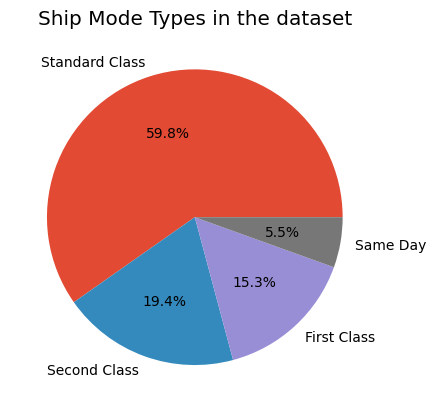

In [21]:
# Creating a pie chart


plt.pie(df['Ship Mode'].value_counts() , labels=ship_mode.index , autopct='%1.1f%%')

plt.title('Ship Mode Types in the dataset')

plt.show()

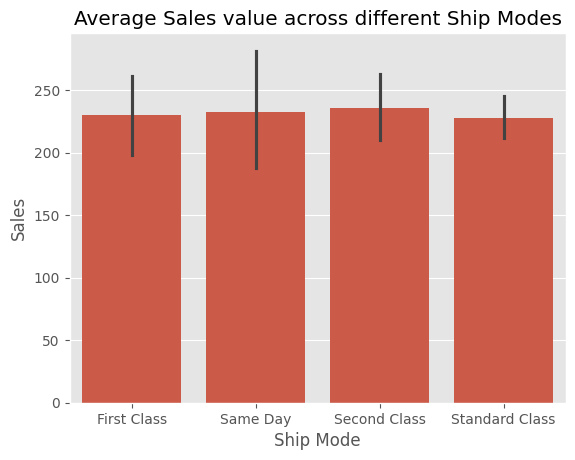

In [22]:
# lets check with Segment and Sales

sns.barplot(x = df['Ship Mode'] , y=df['Sales'])
plt.title('Average Sales value across different Ship Modes')
plt.show()

**Average Sales value is slightly higher for same day ship mode**

#

<h3 style="color: black;">City Analysis</h3>

In [23]:
# the top 5 most frequent cities
top_cities = df['City'].value_counts().head(5)

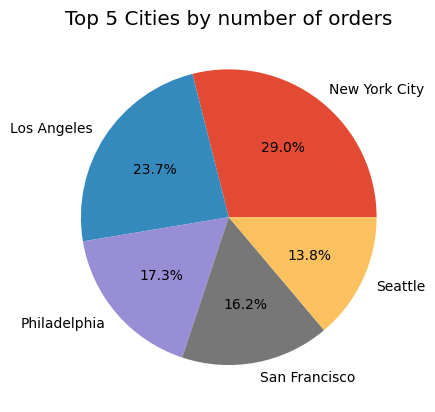

In [24]:
# Creating a pie chart

# Create the pie chart with labels corresponding to the top 5 cities
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%')

# Set the title
plt.title('Top 5 Cities by number of orders')

# Display the pie chart
plt.show()

**The following cities have highest number of orders being dilevered : New York , Los Angeles , San Francisco**

In [25]:
# Get the top 5 cities with the most occurrences (i.e., highest number of orders)
top_5_cities_by_orders = df['City'].value_counts().head(5).index
top_5_cities_by_orders

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle'],
      dtype='object', name='City')

In [26]:
# Calculate the average sales for these top 5 cities
avg_sales_by_top_cities = df[df['City'].isin(top_5_cities_by_orders)].groupby('City')['Sales'].mean()
avg_sales_by_top_cities

City
Los Angeles      237.626374
New York City    282.729517
Philadelphia     204.024436
San Francisco    217.470000
Seattle          271.941315
Name: Sales, dtype: float64

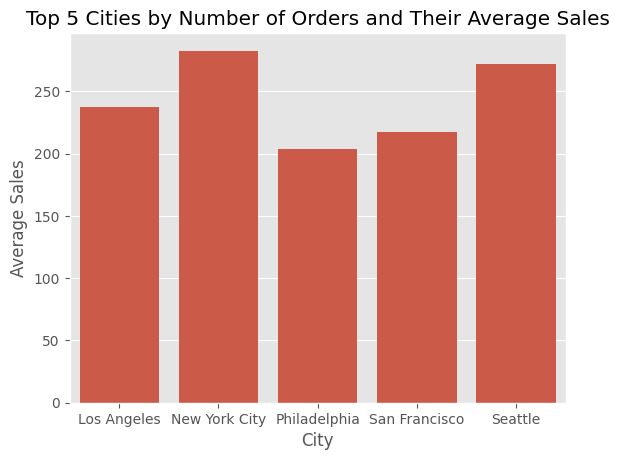

In [27]:
# Plotting the barplot for the top 5 cities with the highest number of orders and their average sales
sns.barplot(x=avg_sales_by_top_cities.index, y=avg_sales_by_top_cities.values)

# Add title and labels
plt.title('Top 5 Cities by Number of Orders and Their Average Sales')
plt.xlabel('City')
plt.ylabel('Average Sales')

# Show the plot
plt.show()

**New york has the highest Average Sales followed by Seattle**

#


<h3 style="color: black;">State Analysis</h3>

In [28]:
# the top 5 most frequent cities
top_states = df['State'].value_counts().head(5)
top_states

State
California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: count, dtype: int64

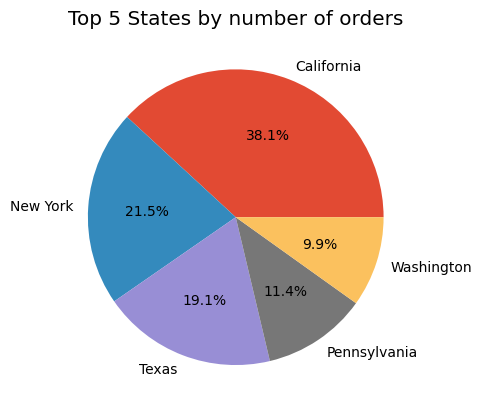

In [29]:
# Creating a pie chart

# Create the pie chart with labels corresponding to the top 5 cities
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%')

# Set the title
plt.title('Top 5 States by number of orders')

# Display the pie chart
plt.show()

**The following States have highest number of orders being dilevered : California ,New york, Texas**

In [30]:
# Get the top 5 cities with the most occurrences (i.e., highest number of orders)
top_5_states_by_orders = df['State'].value_counts().head(5).index
top_5_states_by_orders

Index(['California', 'New York', 'Texas', 'Pennsylvania', 'Washington'], dtype='object', name='State')

In [31]:
# Calculate the average sales for these top 5 cities
avg_sales_by_top_states = df[df['State'].isin(top_5_states_by_orders)].groupby('State')['Sales'].mean()
avg_sales_by_top_states

State
California      228.747174
New York        278.651778
Pennsylvania    199.223368
Texas           172.699897
Washington      267.656746
Name: Sales, dtype: float64

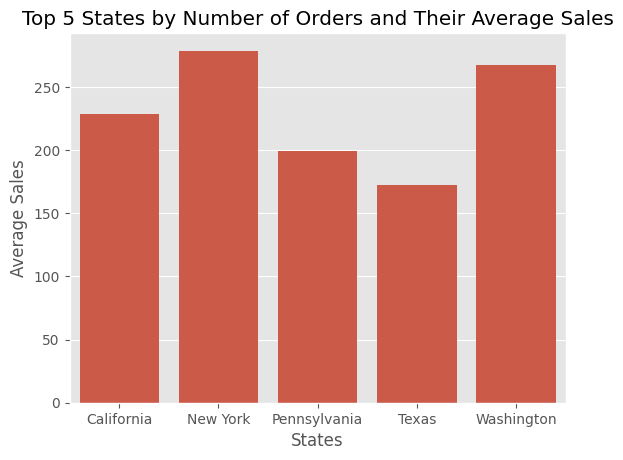

In [32]:
# Plotting the barplot for the top 5 cities with the highest number of orders and their average sales
sns.barplot(x=avg_sales_by_top_states.index, y=avg_sales_by_top_states.values)

# Add title and labels
plt.title('Top 5 States by Number of Orders and Their Average Sales')
plt.xlabel('States')
plt.ylabel('Average Sales')

# Show the plot
plt.show()

**New york and Washington have highest Average Sales**

#

<h3 style="color: black;">Regional Analysis</h3>

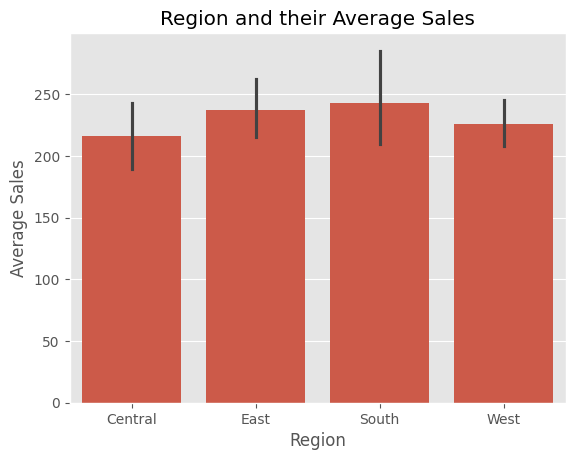

In [33]:
# Plotting the barplot for region and their average sales
sns.barplot(x=df['Region'], y=df['Sales'])

# Add title and labels
plt.title('Region and their Average Sales')
plt.xlabel('Region')
plt.ylabel('Average Sales')

# Show the plot
plt.show()

**South Region has the highest average sales**

#

<h3 style="color: black;">Category and Sales Analysis</h3>

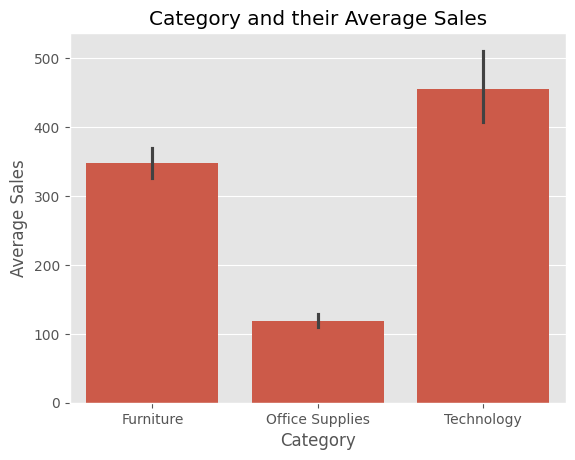

In [34]:
# Plotting the barplot for Category and their average sales
sns.barplot(x=df['Category'], y=df['Sales'])

# Add title and labels
plt.title('Category and their Average Sales')
plt.xlabel('Category')
plt.ylabel('Average Sales')

# Show the plot
plt.show()

**Technology has the highest average sales in category**

#


<h3 style="color: black;">Sub Category Analysis</h3>


In [35]:
# group data by product sub category vs sales

pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

top_pdt_subcategory = pdt_subcategory.sort_values(by='Sales',ascending=False)

print(top_pdt_subcategory.reset_index(drop=True))

   Sub-Category   Sales
0        Phones  325832
1        Chairs  321760
2       Storage  217312
3        Tables  202646
4       Binders  199225
5      Machines  189155
6   Accessories  163371
7       Copiers  146184
8     Bookcases  109258
9    Appliances  103813
10  Furnishings   88692
11        Paper   75953
12     Supplies   46322
13          Art   26270
14    Envelopes   15980
15       Labels   12159
16    Fasteners    2894


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23788\595326063.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()


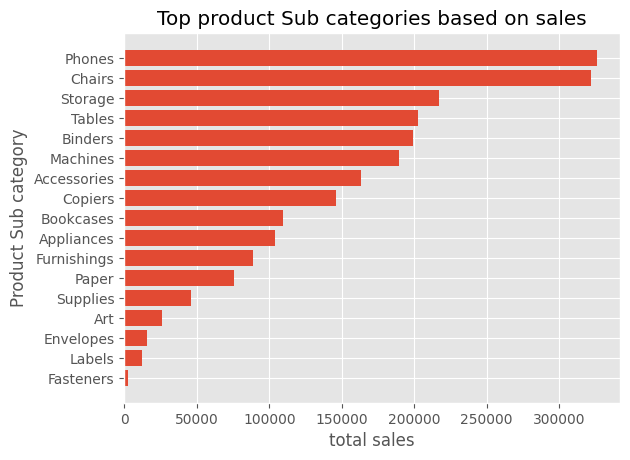

In [36]:
top_pdt_subcategory = top_pdt_subcategory.sort_values(by='Sales',ascending=True)

plt.barh(top_pdt_subcategory['Sub-Category'],top_pdt_subcategory['Sales'])

plt.title('Top product Sub categories based on sales')
plt.ylabel('Product Sub category')
plt.xlabel('total sales')

plt.show()

**Phones and Chairs have the highest Average Sales among sub-category**

#


<h3 style="color: black;">Product Analysis</h3>


In [37]:
df['Product Name'].value_counts()

Product Name
Staple envelope                                                              47
Staples                                                                      46
Easy-staple paper                                                            44
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      18
                                                                             ..
Park Ridge Embossed Executive Business Envelopes                              1
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier         1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection     1
Boston 1900 Electric Pencil Sharpener                                         1
LG G2                                                                         1
Name: count, Length: 1848, dtype: int64

In [38]:
# Get the top 5 Produxts with the most occurrences (i.e., highest number of orders)
top_5_products_by_orders = df['Product Name'].value_counts().head(5).index
top_5_products_by_orders

Index(['Staple envelope', 'Staples', 'Easy-staple paper',
       'Avery Non-Stick Binders', 'Staples in misc. colors'],
      dtype='object', name='Product Name')

In [39]:
# Calculate the average sales for these top 5 products
avg_sales_by_top_products = df[df['Product Name'].isin(top_5_products_by_orders)].groupby('Product Name')['Sales'].mean()
avg_sales_by_top_products

Product Name
Avery Non-Stick Binders    10.300000
Easy-staple paper          54.318182
Staple envelope            35.106383
Staples                    15.891304
Staples in misc. colors    25.000000
Name: Sales, dtype: float64

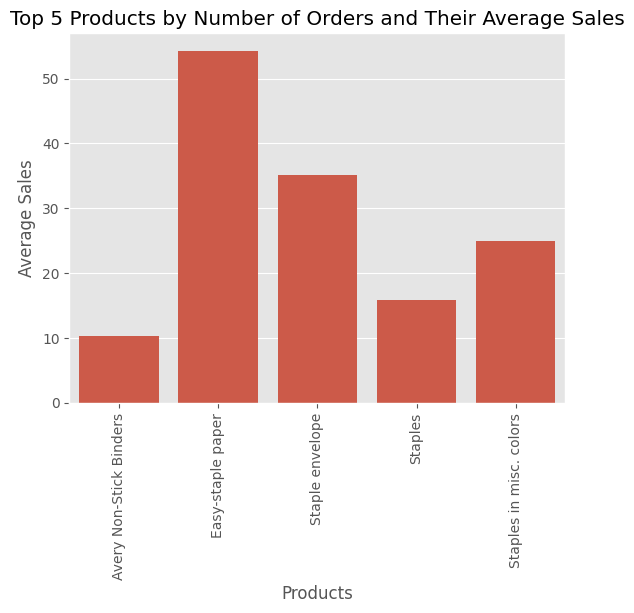

In [40]:
# Plotting the barplot for the top 5 cities with the highest number of orders and their average sales
sns.barplot(x=avg_sales_by_top_products.index, y=avg_sales_by_top_products.values)

# Add title and labels
plt.title('Top 5 Products by Number of Orders and Their Average Sales')
plt.xlabel('Products')
plt.ylabel('Average Sales')

plt.xticks(rotation=90)
# Show the plot
plt.show()

**Easy staple paper has the highest average sales followed by staple envelope in Product type**

#


<h2 style="color: gold;">Time Series Analysis</h2>

#


<h3 style="color: black;">Year on Year Sales Analysis</h3>


In [41]:
# grouping by year and summing sales per year

yearly_sales = df.groupby(df['Order year'])['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
# yearly_sales = yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})

print(yearly_sales)

   Order year   Sales
0        2015  478695
1        2016  453098
2        2017  595747
3        2018  719286


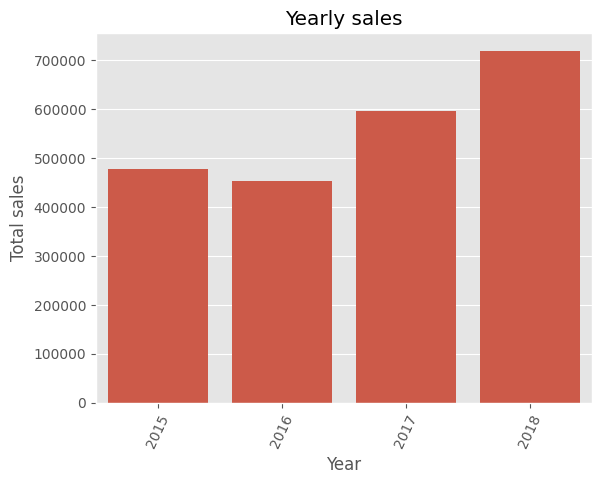

In [42]:
sns.barplot(x = yearly_sales['Order year'],y = yearly_sales['Sales'])

plt.title('Yearly sales')
plt.xlabel('Year')
plt.ylabel('Total sales')

plt.xticks(rotation=65)
plt.show()

**There was a dip in sales from 2015 to 2016 but since then the sales have increased a lot**

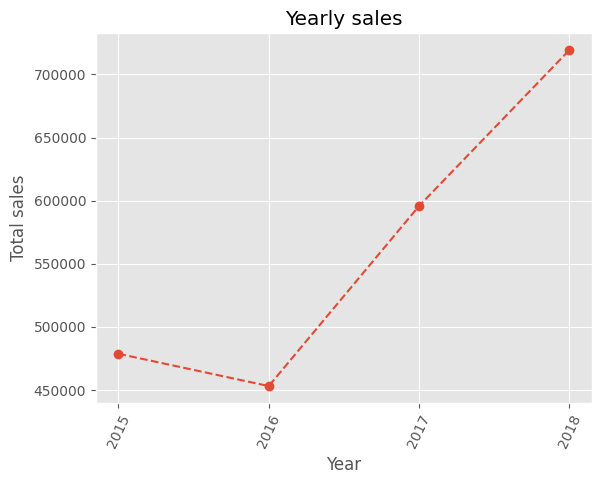

In [43]:
plt.plot(yearly_sales['Order year'],yearly_sales['Sales'], marker='o', linestyle='--')

plt.title('Yearly sales')
plt.xlabel('Year')
plt.ylabel('Total sales')

# Set x-ticks to be integer values (e.g., 2015, 2016, 2017)
plt.xticks(yearly_sales['Order year'])

plt.xticks(rotation=65)
plt.show()

   Order year   Sales  Percentage Change
0        2015  478695                NaN
1        2016  453098          -5.347246
2        2017  595747          31.483035
3        2018  719286          20.736823


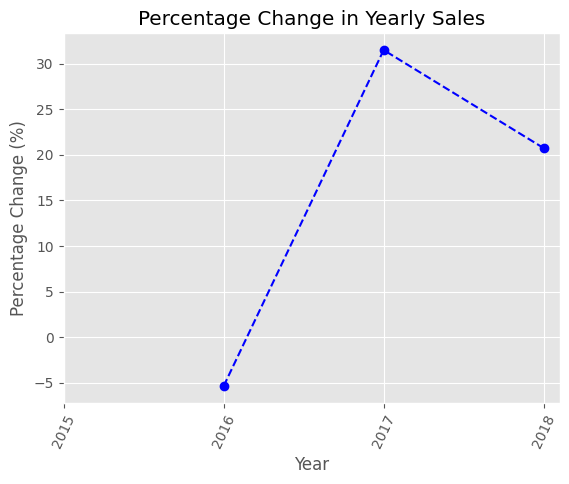

In [44]:
# Calculate percentage change in total sales year over year
yearly_sales['Percentage Change'] = yearly_sales['Sales'].pct_change() * 100

# Print the DataFrame to check
print(yearly_sales)

# Plotting the percentage change in sales
plt.plot(yearly_sales['Order year'], yearly_sales['Percentage Change'], marker='o', linestyle='--', color='b')

# Add title and labels
plt.title('Percentage Change in Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')

# Set x-ticks to be integer values (e.g., 2015, 2016, 2017)
plt.xticks(yearly_sales['Order year'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=65)

# Show the plot
plt.show()


**The sales decreased by 5%  from 2015 to 2016 then increased by 30% from 2016 to 2017 then again decreased by 10% in 2017-2018**

#

<h3 style="color: black;">Quarterly Analysis</h3>


In [45]:
# filter data acc to Year
year_sales = df[df['Order Date'].dt.year == 2018 ]

# calculate quaterly sales for 2018

quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales= quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})

print('These are the quarterly sales for 2018')
print(quarterly_sales)

These are the quarterly sales for 2018
     Quarter  Total Sales
0 2018-03-31       121336
1 2018-06-30       127175
2 2018-09-30       193281
3 2018-12-31       277494


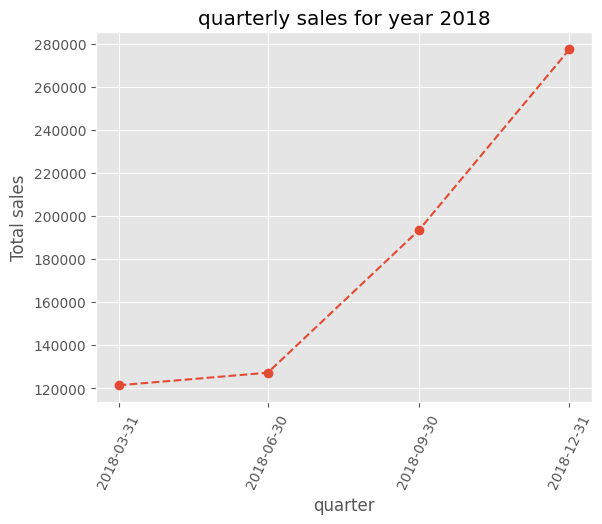

In [46]:
plt.plot(quarterly_sales['Quarter'],quarterly_sales['Total Sales'], marker='o', linestyle='--')

plt.title('quarterly sales for year 2018')
plt.xlabel('quarter')
plt.ylabel('Total sales')

# Set x-ticks to be integer values 
plt.xticks(quarterly_sales['Quarter'])

plt.xticks(rotation=65)
plt.show()

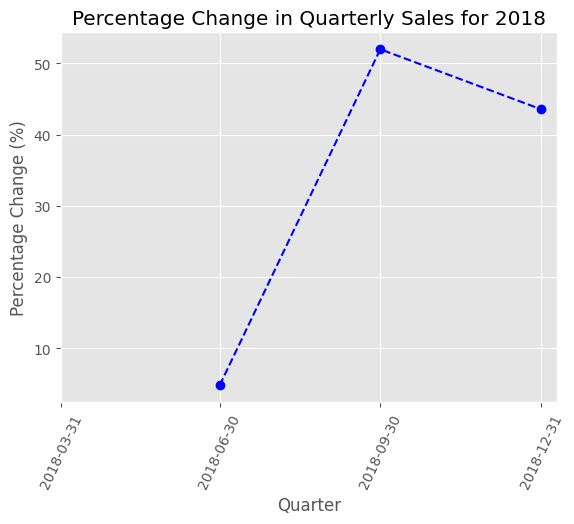

In [47]:
# Calculate the percentage change in quarterly sales
quarterly_sales['Percentage Change'] = quarterly_sales['Total Sales'].pct_change() * 100


# Plotting the percentage change in sales
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Percentage Change'], marker='o', linestyle='--', color='b')

# Add title and labels
plt.title('Percentage Change in Quarterly Sales for 2018')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=65)

# Set x-ticks to be integer values 
plt.xticks(quarterly_sales['Quarter'])
# Show the plot
plt.show()


**2018 saw a significant increase in quarterly sales. The highest sales were recorded in Q4. While Q3 witnessed a remarkable 54% growth, Q4's growth slowed to 35%.**

In [48]:
# filter data acc to Year
year_sales = df[df['Order Date'].dt.year == 2017 ]

# calculate quaterly sales for 2018

quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales= quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})

print('These are the quarterly sales for 2017')
print(quarterly_sales)

These are the quarterly sales for 2017
     Quarter  Total Sales
0 2017-03-31        90815
1 2017-06-30       133425
2 2017-09-30       137645
3 2017-12-31       233862


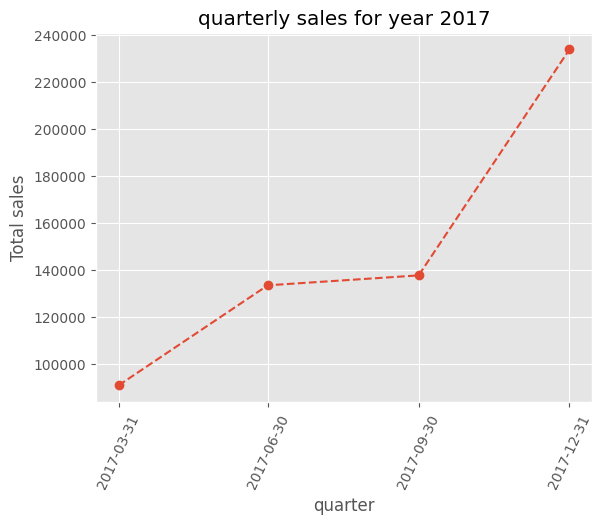

In [49]:
plt.plot(quarterly_sales['Quarter'],quarterly_sales['Total Sales'], marker='o', linestyle='--')

plt.title('quarterly sales for year 2017')
plt.xlabel('quarter')
plt.ylabel('Total sales')

# Set x-ticks to be integer values 
plt.xticks(quarterly_sales['Quarter'])

plt.xticks(rotation=65)
plt.show()

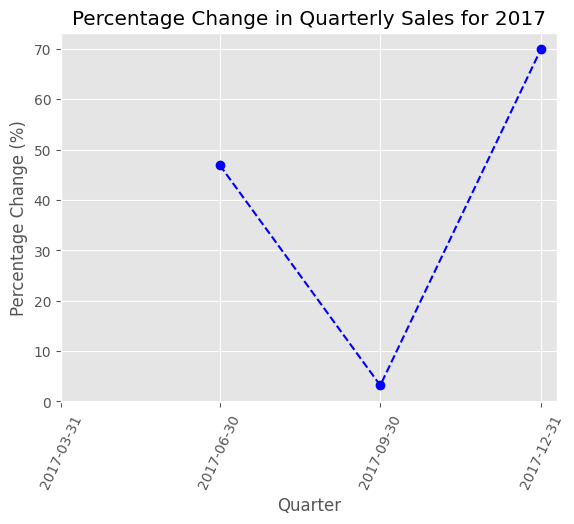

In [50]:
# Calculate the percentage change in quarterly sales
quarterly_sales['Percentage Change'] = quarterly_sales['Total Sales'].pct_change() * 100


# Plotting the percentage change in sales
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Percentage Change'], marker='o', linestyle='--', color='b')

# Add title and labels
plt.title('Percentage Change in Quarterly Sales for 2017')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=65)

# Set x-ticks to be integer values 
plt.xticks(quarterly_sales['Quarter'])
# Show the plot
plt.show()


**2017 saw a steady increase in quarterly sales, with the highest sales recorded in Q4. While Q3 witnessed a moderate 15% growth, Q4's growth accelerated to 55%.**

In [51]:
# filter data acc to Year
year_sales = df[df['Order Date'].dt.year == 2016 ]

# calculate quaterly sales for 2018

quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales= quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})

print('These are the quarterly sales for 2016')
print(quarterly_sales)

These are the quarterly sales for 2016
     Quarter  Total Sales
0 2016-03-31        62209
1 2016-06-30        87456
2 2016-09-30       128224
3 2016-12-31       175209


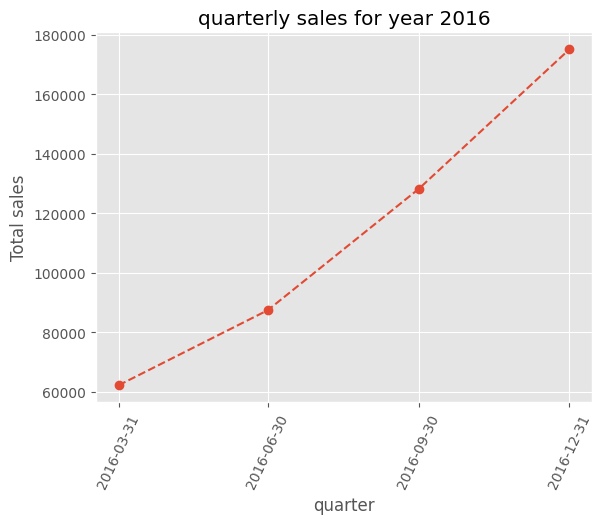

In [52]:
plt.plot(quarterly_sales['Quarter'],quarterly_sales['Total Sales'], marker='o', linestyle='--')

plt.title('quarterly sales for year 2016')
plt.xlabel('quarter')
plt.ylabel('Total sales')

# Set x-ticks to be integer values 
plt.xticks(quarterly_sales['Quarter'])

plt.xticks(rotation=65)
plt.show()

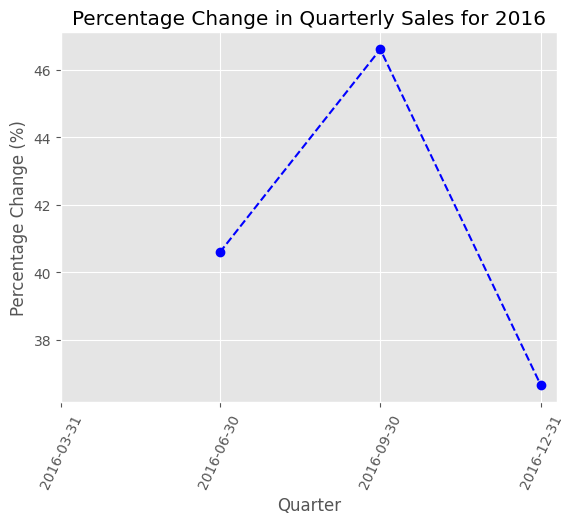

In [53]:
# Calculate the percentage change in quarterly sales
quarterly_sales['Percentage Change'] = quarterly_sales['Total Sales'].pct_change() * 100


# Plotting the percentage change in sales
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Percentage Change'], marker='o', linestyle='--', color='b')

# Add title and labels
plt.title('Percentage Change in Quarterly Sales for 2016')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=65)

# Set x-ticks to be integer values 
plt.xticks(quarterly_sales['Quarter'])
# Show the plot
plt.show()


In [54]:
# filter data acc to Year
year_sales = df[df['Order Date'].dt.year == 2015 ]

# calculate quaterly sales for 2018

quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales= quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})

print('These are the quarterly sales for 2015')
print(quarterly_sales)

These are the quarterly sales for 2015
     Quarter  Total Sales
0 2015-03-31        73768
1 2015-06-30        85653
2 2015-09-30       142189
3 2015-12-31       177085


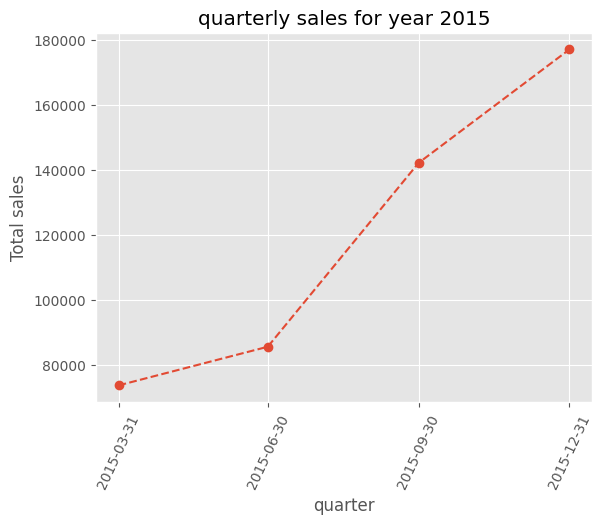

In [55]:
plt.plot(quarterly_sales['Quarter'],quarterly_sales['Total Sales'], marker='o', linestyle='--')

plt.title('quarterly sales for year 2015')
plt.xlabel('quarter')
plt.ylabel('Total sales')

# Set x-ticks to be integer values 
plt.xticks(quarterly_sales['Quarter'])

plt.xticks(rotation=65)
plt.show()

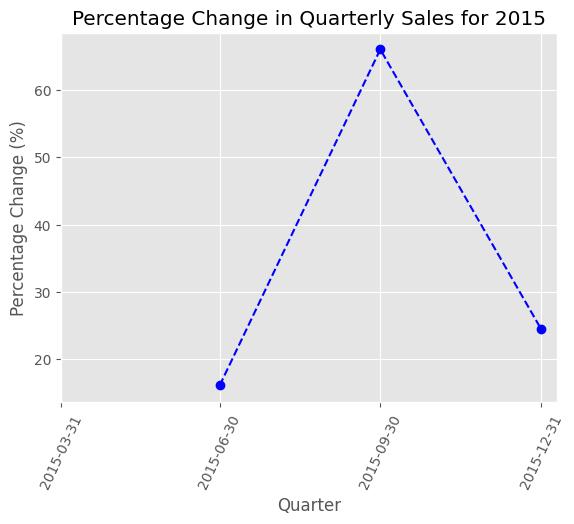

In [56]:
# Calculate the percentage change in quarterly sales
quarterly_sales['Percentage Change'] = quarterly_sales['Total Sales'].pct_change() * 100


# Plotting the percentage change in sales
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Percentage Change'], marker='o', linestyle='--', color='b')

# Add title and labels
plt.title('Percentage Change in Quarterly Sales for 2015')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=65)

# Set x-ticks to be integer values 
plt.xticks(quarterly_sales['Quarter'])
# Show the plot
plt.show()


#


<h3 style="color: black;">Month on Month Sales Analysis</h3>


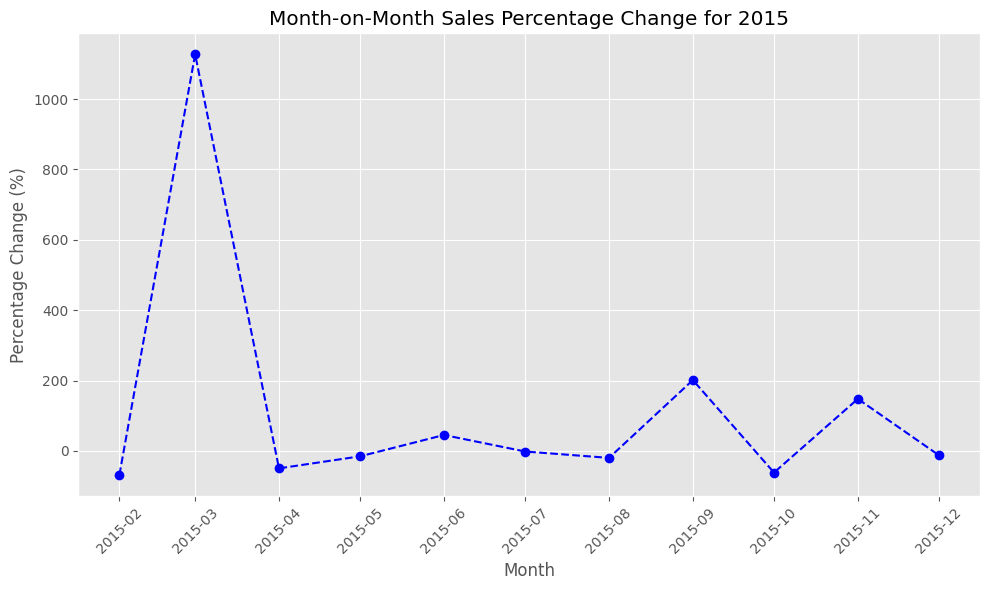

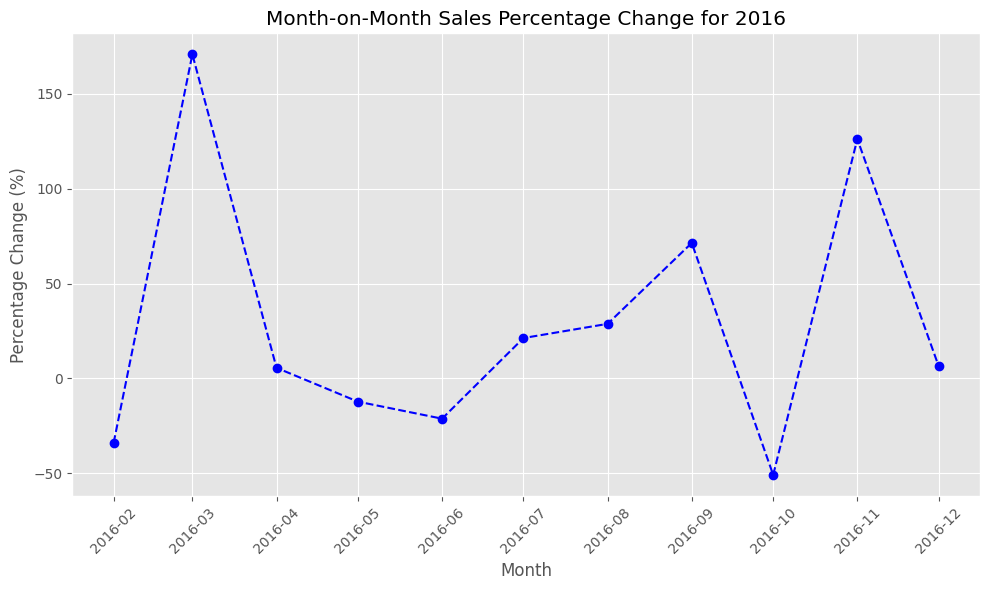

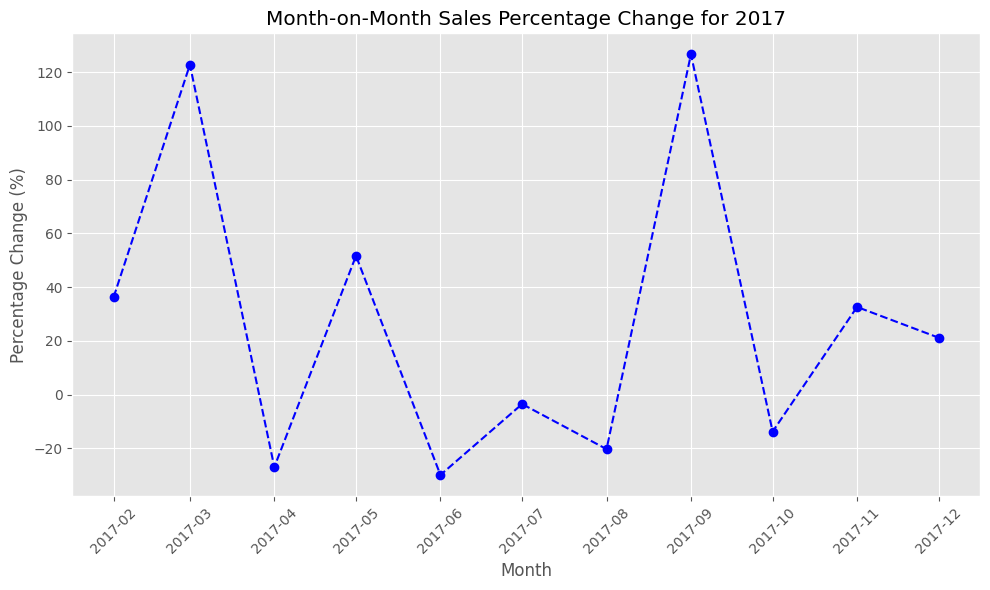

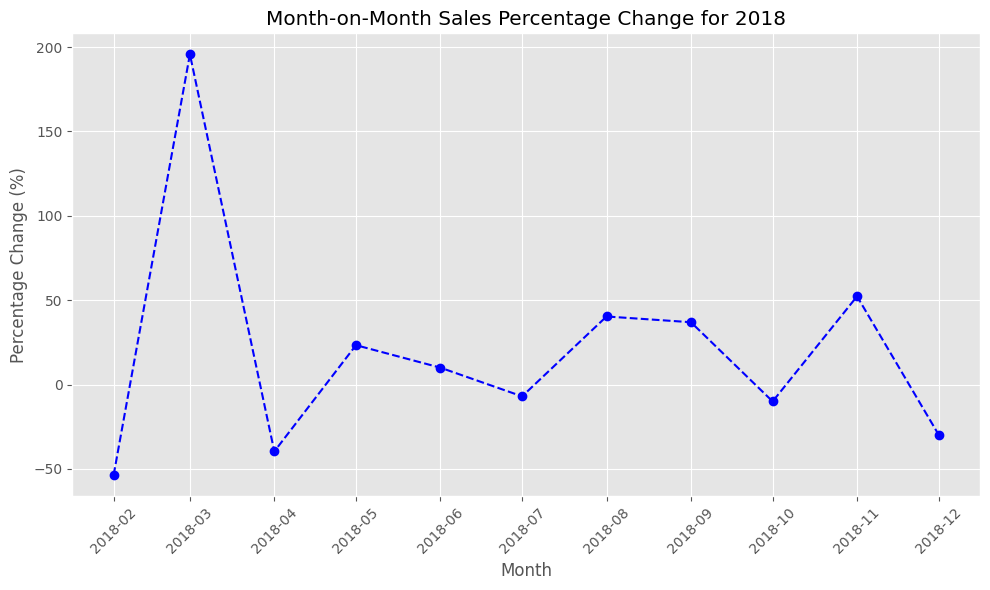

In [57]:

# Assuming your dataframe is called df
# If 'Order Y-M' is already in Period format, we directly convert it to Timestamp
df['Order Y-M'] = df['Order Y-M'].dt.to_timestamp()

# Filter data for specific years
years = [2015, 2016, 2017, 2018]

# Create a plot for each year
for year in years:
    # Filter data for the specific year
    year_data = df[df['Order Y-M'].dt.year == year]
    
    # Group by 'Order Y-M' and calculate total sales per month
    monthly_sales = year_data.groupby('Order Y-M')['Sales'].sum()
    
    # Calculate percentage change month-over-month
    monthly_sales_percentage_change = monthly_sales.pct_change() * 100  # Convert to percentage
    
    # Plotting the percentage change
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales_percentage_change.index, monthly_sales_percentage_change.values, marker='o', linestyle='--', color='b')
    
    # Add title and labels
    plt.title(f'Month-on-Month Sales Percentage Change for {year}')
    plt.xlabel('Month')
    plt.ylabel('Percentage Change (%)')
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()  # To make sure the labels fit nicely
    plt.show()


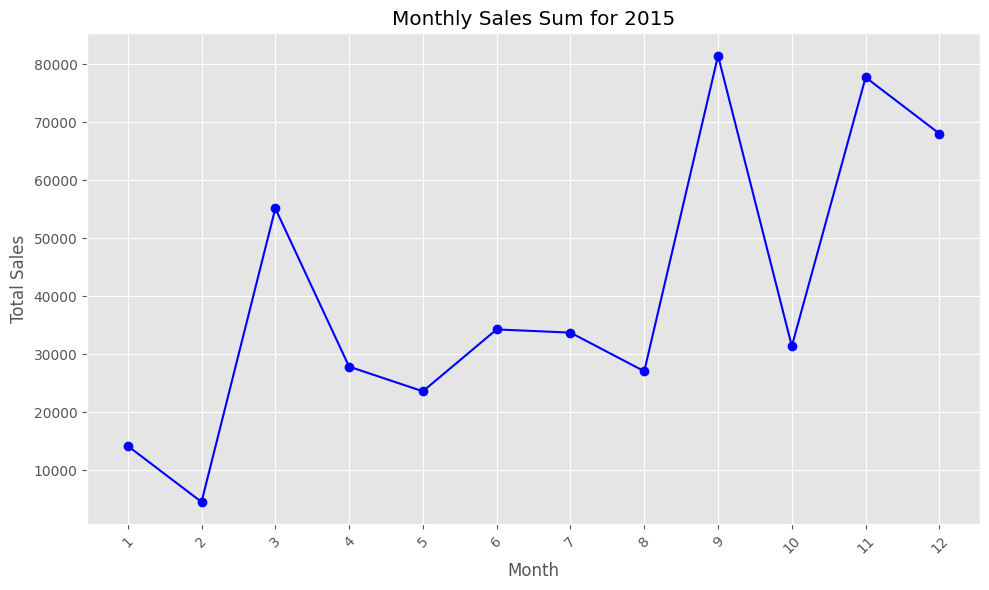

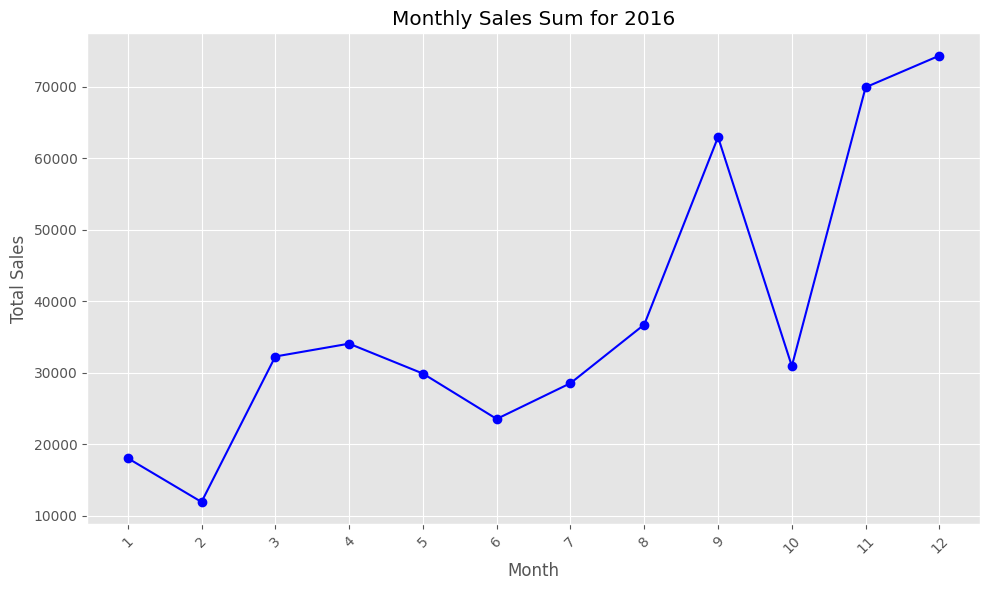

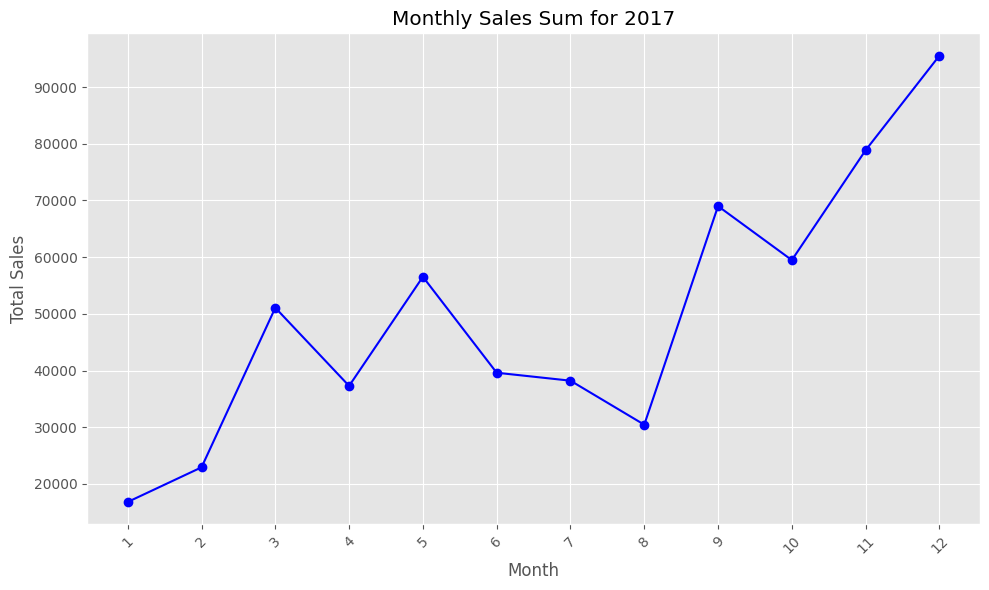

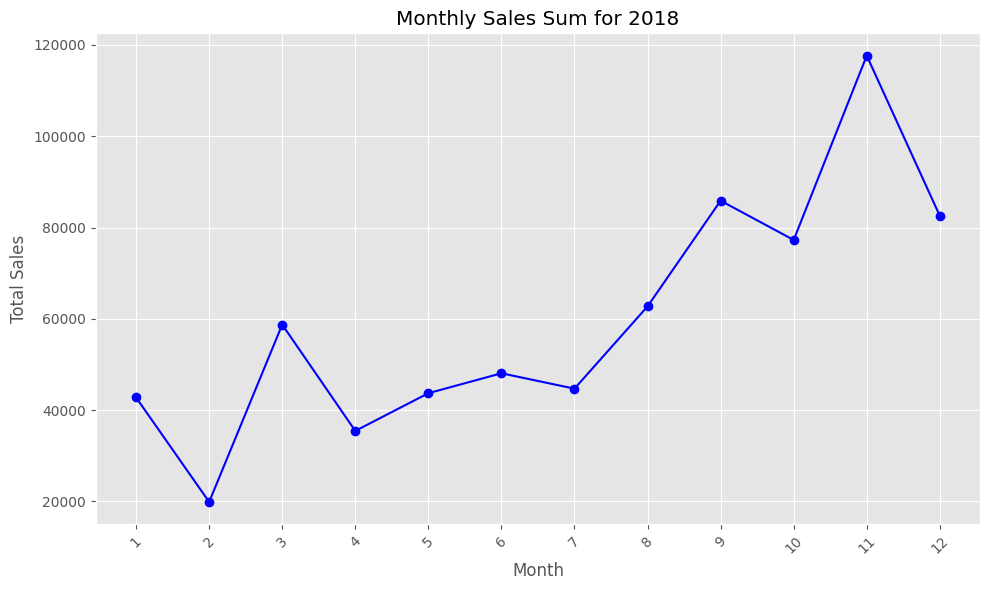

In [58]:


# Ensure 'Order Y-M' is in datetime format for grouping
df['Order Y-M'] = pd.to_datetime(df['Order Y-M'], format='%Y-%m')

# Filter data for specific years
years = [2015, 2016, 2017, 2018]

# Create a plot for each year (Monthly Sales Sum)
for year in years:
    # Filter data for the specific year
    year_data = df[df['Order Y-M'].dt.year == year]
    
    # Group by 'Order Y-M' and calculate total sales per month
    monthly_sales = year_data.groupby('Order Y-M')['Sales'].sum()
    
    # Ensure all months (1 to 12) are present
    # We will use a complete list of months for the x-axis
    all_months = pd.date_range(f'{year}-01-01', f'{year}-12-01', freq='MS')  # MS = Month Start
    
    # Reindex the monthly_sales to have all months, filling missing months with NaN or 0
    monthly_sales = monthly_sales.reindex(all_months, fill_value=0)  # Fill missing months with 0 sales
    
    # Plotting the sales sum
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales.index.month, monthly_sales.values, marker='o', linestyle='-', color='b', label='Total Sales')
    
    # Add title and labels
    plt.title(f'Monthly Sales Sum for {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    
    # Set x-ticks to show all months (1 to 12)
    plt.xticks(range(1, 13))  # 1 to 12 for all months
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()  # To make sure the labels fit nicely
    plt.show()


#

#


<h2 style="color: gold;">Key Findings</h2>

- **Average Sales value is highest for Home Office Segment**

- **The following cities have highest number of orders being dilevered : New York , Los Angeles , San Francisco**

- **New york and Washington States have highest Average Sales**

- **South Region has the highest average sales**

- **Technology has the highest average sales in category**

- **Phone and Chairs have the highest Average Sales among sub-category**

- **Easy staple paper has the highest average sales followed by staple envelope in Product type**

- **Average Sales value is slightly higher for same day ship mode**

- **Most Popular ship mode is standard class**

- **The sales decreased by 5%  from 2015 to 2016 then increased by 30% from 2016 to 2017 then again decreased by 10% in 2017-2018**

- **2018 saw a significant increase in quarterly sales. The highest sales were recorded in Q4. While Q3 witnessed a remarkable 54% growth, Q4's growth slowed to 35%.**

- **2017 saw a steady increase in quarterly sales, with the highest sales recorded in Q4. While Q3 witnessed a moderate 15% growth, Q4's growth accelerated to 55%.**

- **2016 saw a steady increase in quarterly sales, with the highest sales recorded in Q4. While Q3 witnessed a moderate 25% growth, Q4's growth accelerated to 33%.**

- **2015 saw a steady increase in quarterly sales, with the highest sales recorded in Q4. While Q3 witnessed a moderate 20% growth, Q4's growth accelerated to 25%.**

- **2015 saw a fluctuating trend in monthly sales. The highest sales were recorded in September, followed by a significant drop in October. November witnessed a recovery, but December saw a decline again.**

- **2016 saw a fluctuating trend in monthly sales. The highest sales were recorded in September, followed by a significant drop in October. November witnessed a recovery, but December saw a decline again.**

- **2017 saw a fluctuating trend in monthly sales. The highest sales were recorded in December, followed by a significant drop in October. November witnessed a recovery, but December saw a decline again.**

- **2018 saw a fluctuating trend in monthly sales. The highest sales were recorded in November, followed by a significant drop in December. October witnessed a recovery, but December saw a decline again.**